# **Sentiment Analysis of #HowardUniversity Tweets**
This project performs sentiment analysis of 2500 tweets that include the #HowardUniverstiy hashtag using:
- Tweepy: Python library to access Twitter objects
- Natural Language Toolkit: Python library for NLP
- Textblob:


Author: Cassey Anene

 ### *Installing and Importing Libraries*


In [ ]:
!pip install textblob
!pip install tweepy
!pip install pycountry
!pip install langdetect

     |████████████████████████████████| 10.1 MB 5.3 MB/s 
  Created wheel for pycountry: filename=pycountry-20.7.3-py2.py3-none-any.whl size=10746883 sha256=8b438d2e2babc4b564702c0741b5f73138325ed63e163bd7dbaa6ad086ed9af4
  Stored in directory: /root/.cache/pip/wheels/57/e8/3f/120ccc1ff7541c108bc5d656e2a14c39da0d824653b62284c6
Successfully built pycountry
     |████████████████████████████████| 981 kB 5.4 MB/s 
  Created wheel for langdetect: filename=langdetect-1.0.9-py3-none-any.whl size=993242 sha256=3440b999f0f88614fbe4b0102cc4ba90862dd5d0370b82be57c3d01e441c0026
  Stored in directory: /root/.cache/pip/wheels/c5/96/8a/f90c59ed25d75e50a8c10a1b1c2d4c402e4dacfa87f3aff36a
Successfully built langdetect


In [ ]:
# import the libraries
from textblob import TextBlob
import sys
import tweepy
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os
import nltk
nltk.downloader.download('vader_lexicon')
import pycountry
import re
import string
from wordcloud import WordCloud, STOPWORDS
from PIL import Image
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from langdetect import detect
from nltk.stem import SnowballStemmer
from sklearn.feature_extraction.text import CountVectorizer

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


/usr/local/lib/python3.7/dist-packages/nltk/twitter/__init__.py:20: UserWarning: The twython library has not been installed. Some functionality from the twitter package will not be available.
  warnings.warn("The twython library has not been installed. "


### *Authentication*
Keys censored on Github for privacy

In [ ]:
# Authentication
consumerKey = "XXXXX"
consumerSecret = "XXXX"
accessToken = "XXXXX"
accessTokenSecret = "XXXXX"

auth = tweepy.OAuthHandler(consumerKey, consumerSecret)
auth.set_access_token(accessToken, accessTokenSecret)
api = tweepy.API(auth)

### *Importing Tweets*
Using the Twitter API to import tweets with #HowardUniversity

In [ ]:
# Importing the tweets with the HowardUniversity hashtag in preparation to analyze
keyword = "#HowardUniversity"
noOfTweet = 2500
tweets = tweepy.Cursor(api.search, q=keyword).items(noOfTweet)

### *Analysis*
Using the SentimentIntensityAnalyzer function of the NLTK library to get the score of the tweet and adding all the tweets to a list. 

In [ ]:
# Sentiment Analysis
def percentage(part,whole):
  return 100 * float(part)/float(whole)

positive = 0
negative = 0
neutral = 0
polarity = 0
tweet_list = []
neutral_list = []
negative_list = []
positive_list = []

for tweet in tweets:
  tweet_list.append(tweet.text)
  analysis = TextBlob(tweet.text)
  score = SentimentIntensityAnalyzer().polarity_scores(tweet.text)
  neg = score["neg"]
  neu = score["neu"]
  pos = score["pos"]
  comp = score["compound"]
  polarity += analysis.sentiment.polarity
  
  if neg > pos:
    negative_list.append(tweet.text)
    negative += 1
  elif pos > neg:
    positive_list.append(tweet.text)
    positive += 1
  elif pos == neg:
    neutral_list.append(tweet.text)
    neutral += 1
  positive_percent = percentage(positive, noOfTweet)
  negative_percent = percentage(negative, noOfTweet)
  neutral_percent = percentage(neutral, noOfTweet)
  polarity = percentage(polarity, noOfTweet)
positive = format(positive, ".1f")
negative = format(negative, ".1f")
neutral = format(neutral, ".1f")

In [ ]:
# Looking at the Breakdown of positive, negative, and neutral tweets
tweet_list = pd.DataFrame(tweet_list)
neutral_list = pd.DataFrame(neutral_list)
negative_list = pd.DataFrame(negative_list)
positive_list = pd.DataFrame(positive_list)
print("total number: ",len(tweet_list))
print("positive number: ",len(positive_list))
print("negative number: ", len(negative_list))
print("neutral number: ",len(neutral_list))

total number:  2500
positive number:  282
negative number:  1172
neutral number:  1046


### *Creating PieChart*
Using a piechart to vizualize the the breakdown of each connotation. 

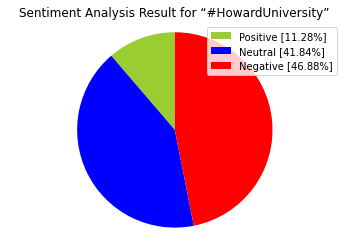

In [ ]:

labels = ['Positive ['+str(positive_percent)+'%]' , 'Neutral ['+str(neutral_percent)+'%]','Negative ['+str(negative_percent)+'%]']
sizes = [positive, neutral, negative]
colors = ['yellowgreen', 'blue','red']
patches, texts = plt.pie(sizes,colors=colors, startangle=90)
plt.style.use('default')
plt.legend(labels)
plt.title("Sentiment Analysis Result for “#HowardUniversity”")
plt.axis('equal')
plt.show()

In [ ]:
tweet_list

,0
0,RT @AnaDemendoza_: Univision Network News is l...
1,RT @ChuckModi1: “What the students are doing i...
2,"RT @brucejohnson9: Howard University students,..."
3,RT @ChuckModi1: “What the students are doing i...
4,RT @ChuckModi1: “What the students are doing i...
...,...
2495,RT @AngiMaryssa: A class action lawsuit was fi...
2496,RT @WeActRadio: @AfricanaCarr @foreverambre @M...
2497,RT @AngiMaryssa: A class action lawsuit was fi...
2498,RT @AngiMaryssa: A class action lawsuit was fi...


### *Preprocessing*
Removing duplicated and cleaning the tweet text to make it more readable to the model

In [ ]:
#Removing duplicates
tweet_list.drop_duplicates(inplace = True)

In [ ]:
tweet_list #Now we have 373 unique tweets to analyze

,0
0,RT @AnaDemendoza_: Univision Network News is l...
1,RT @ChuckModi1: “What the students are doing i...
2,"RT @brucejohnson9: Howard University students,..."
5,RT @ChuckModi1: “Protesting was part of my edu...
7,RT @AngiMaryssa: A class action lawsuit was fi...
...,...
2293,DM us today for quality results in:\n#Cybersec...
2299,@HUBisonVB won 3-1 vs @scstateathletic at @How...
2307,RT @WeActRadio: @AfricanaCarr @foreverambre @M...
2325,@HUBisonVB won 3-1 vs @scstateathletic at @Ho...


In [ ]:
#Cleaning Tweet text to make it more readable

#Creating new datafram and new features
tw_list = pd.DataFrame(tweet_list)
tw_list["text"] = tw_list[0]

remove_rt = lambda x: re.sub('RT @\w+: '," ",x)
rt = lambda x: re.sub("(@[A-Za-z0–9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)"," ",x)
tw_list["text"] = tw_list.text.map(remove_rt).map(rt)
tw_list["text"] = tw_list.text.str.lower()
tw_list.head(10)

,0,text,polarity,subjectivity,sentiment,neg,neu,pos,compound
0,RT @AnaDemendoza_: Univision Network News is l...,univision network news is looking for spanish...,0.1,0.2,neutral,0.0,1.0,0.0,0.0
1,RT @ChuckModi1: “What the students are doing i...,what the students are doing is helping the f...,0.0,0.0,neutral,0.0,1.0,0.0,0.0
2,"RT @brucejohnson9: Howard University students,...",howard university students not letting up in...,0.0,0.0,neutral,0.0,1.0,0.0,0.0
5,RT @ChuckModi1: “Protesting was part of my edu...,protesting was part of my education at howa...,0.0,0.0,neutral,0.0,1.0,0.0,0.0
7,RT @AngiMaryssa: A class action lawsuit was fi...,a class action lawsuit was filed against ho...,0.0,0.0,neutral,0.0,1.0,0.0,0.0
9,RT @prolpo: #HowardUniversity,howarduniversity,0.0,0.0,neutral,0.0,1.0,0.0,0.0
10,"HU students continue protests, President discu...",hu students continue protests president discu...,0.0,0.0,neutral,0.0,1.0,0.0,0.0
12,This is a shame and should be fixed immediatel...,this is a shame and should be fixed immediatel...,0.0,0.0,neutral,0.0,1.0,0.0,0.0
13,RT @RevYearwood: As a ⁦#HowardU alum this is a...,as a howardu alum this is a national embarr...,0.0,0.0,neutral,0.0,1.0,0.0,0.0
16,Try living on Telegraph Avenue in Berkeley. #H...,try living on telegraph avenue in berkeley h...,0.0,0.0,neutral,0.0,1.0,0.0,0.0


In [ ]:
#Calculating Negative, Positive, Neutral and Compound values
tw_list[["polarity", "subjectivity"]] = tw_list["text"].apply(lambda Text: pd.Series(TextBlob(Text).sentiment))
for index, row in tw_list["text"].iteritems():
  score = SentimentIntensityAnalyzer().polarity_scores(row)
  neg = score["neg"]
  neu = score["neu"]
  pos = score["pos"]
  comp = score["compound"]

  if neg > pos:
    tw_list.loc[index, "sentiment"] = "negative"
  elif pos > neg:
    tw_list.loc[index, "sentiment"] = "positive"
  else:
    tw_list.loc[index, "sentiment"] = "neutral"
    tw_list.loc[index, "neg"] = neg
    tw_list.loc[index, "neu"] = neu
    tw_list.loc[index, "pos"] = pos
    tw_list.loc[index, "compound"] = comp
tw_list.head(10)

,0,text,polarity,subjectivity,sentiment,neg,neu,pos,compound
0,RT @AnaDemendoza_: Univision Network News is l...,univision network news is looking for spanish...,0.0,0.000,negative,0.000,1.000,0.000,0.0
1,RT @ChuckModi1: “What the students are doing i...,what the students are doing is helping the f...,0.0,0.125,negative,0.000,1.000,0.000,0.0
2,"RT @brucejohnson9: Howard University students,...",howard university students not letting up in...,0.0,0.000,negative,0.000,1.000,0.000,0.0
5,RT @ChuckModi1: “Protesting was part of my edu...,protesting was part of my education at howa...,0.0,0.000,negative,0.000,1.000,0.000,0.0
7,RT @AngiMaryssa: A class action lawsuit was fi...,a class action lawsuit was filed against ho...,0.1,0.100,negative,0.000,1.000,0.000,0.0
9,RT @prolpo: #HowardUniversity,howarduniversity,0.0,0.000,neutral,0.000,1.000,0.000,0.0
10,"HU students continue protests, President discu...",hu students continue protests president discu...,-0.1,0.150,negative,0.000,1.000,0.000,0.0
12,This is a shame and should be fixed immediatel...,this is a shame and should be fixed immediatel...,0.1,0.200,negative,0.000,1.000,0.000,0.0
13,RT @RevYearwood: As a ⁦#HowardU alum this is a...,as a howardu alum this is a national embarr...,0.5,0.500,neutral,0.173,0.655,0.173,0.0
16,Try living on Telegraph Avenue in Berkeley. #H...,try living on telegraph avenue in berkeley h...,0.0,0.000,neutral,0.000,1.000,0.000,0.0


In [ ]:
#Creating new data frames for all sentiments (positive, negative and neutral)
tw_list_negative = tw_list[tw_list["sentiment"]=="negative"]
tw_list_positive = tw_list[tw_list["sentiment"]=="positive"]
tw_list_neutral = tw_list[tw_list["sentiment"]=="neutral"]

In [ ]:
def count_values_in_column(data,feature):
  total=data.loc[:,feature].value_counts(dropna=False)
  percentage=round(data.loc[:,feature].value_counts(dropna=False,normalize=True)*100,2)
  return pd.concat([total,percentage],axis=1,keys=["Total","Percentage"])

#Count_values for sentiment
count_values_in_column(tw_list,"sentiment")

,Total,Percentage
neutral,169,44.59
positive,129,34.04
negative,81,21.37


### *Creating Cirle Chart*
Creating a visualizer to show the breakdown of the preprocessed data. 

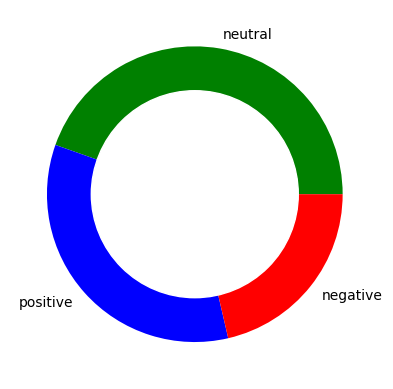

In [ ]:
# create data for Pie Chart
pichart = count_values_in_column(tw_list,"sentiment")
names = pichart.index
size = pichart["Percentage"]
 
# Create a circle for the center of the plot
my_circle=plt.Circle( (0,0), 0.7, color="white")
plt.pie(size, labels=names, colors=["green","blue","red"])
p=plt.gcf()
p.gca().add_artist(my_circle)
plt.show()

### *Creating WordClouds*
Creating WordClouds to visualize the frequency of words associated with postive, negative, and neutral tweets

In [ ]:
#Function to Create Wordcloud
def create_wordcloud(text):
  wc = WordCloud(background_color="white", max_words=3000, stopwords=STOPWORDS,repeat=True)
  wc.generate(str(text))

  plt.figure(figsize=(40, 30))
  plt.imshow(wc)
  plt.axis("off")

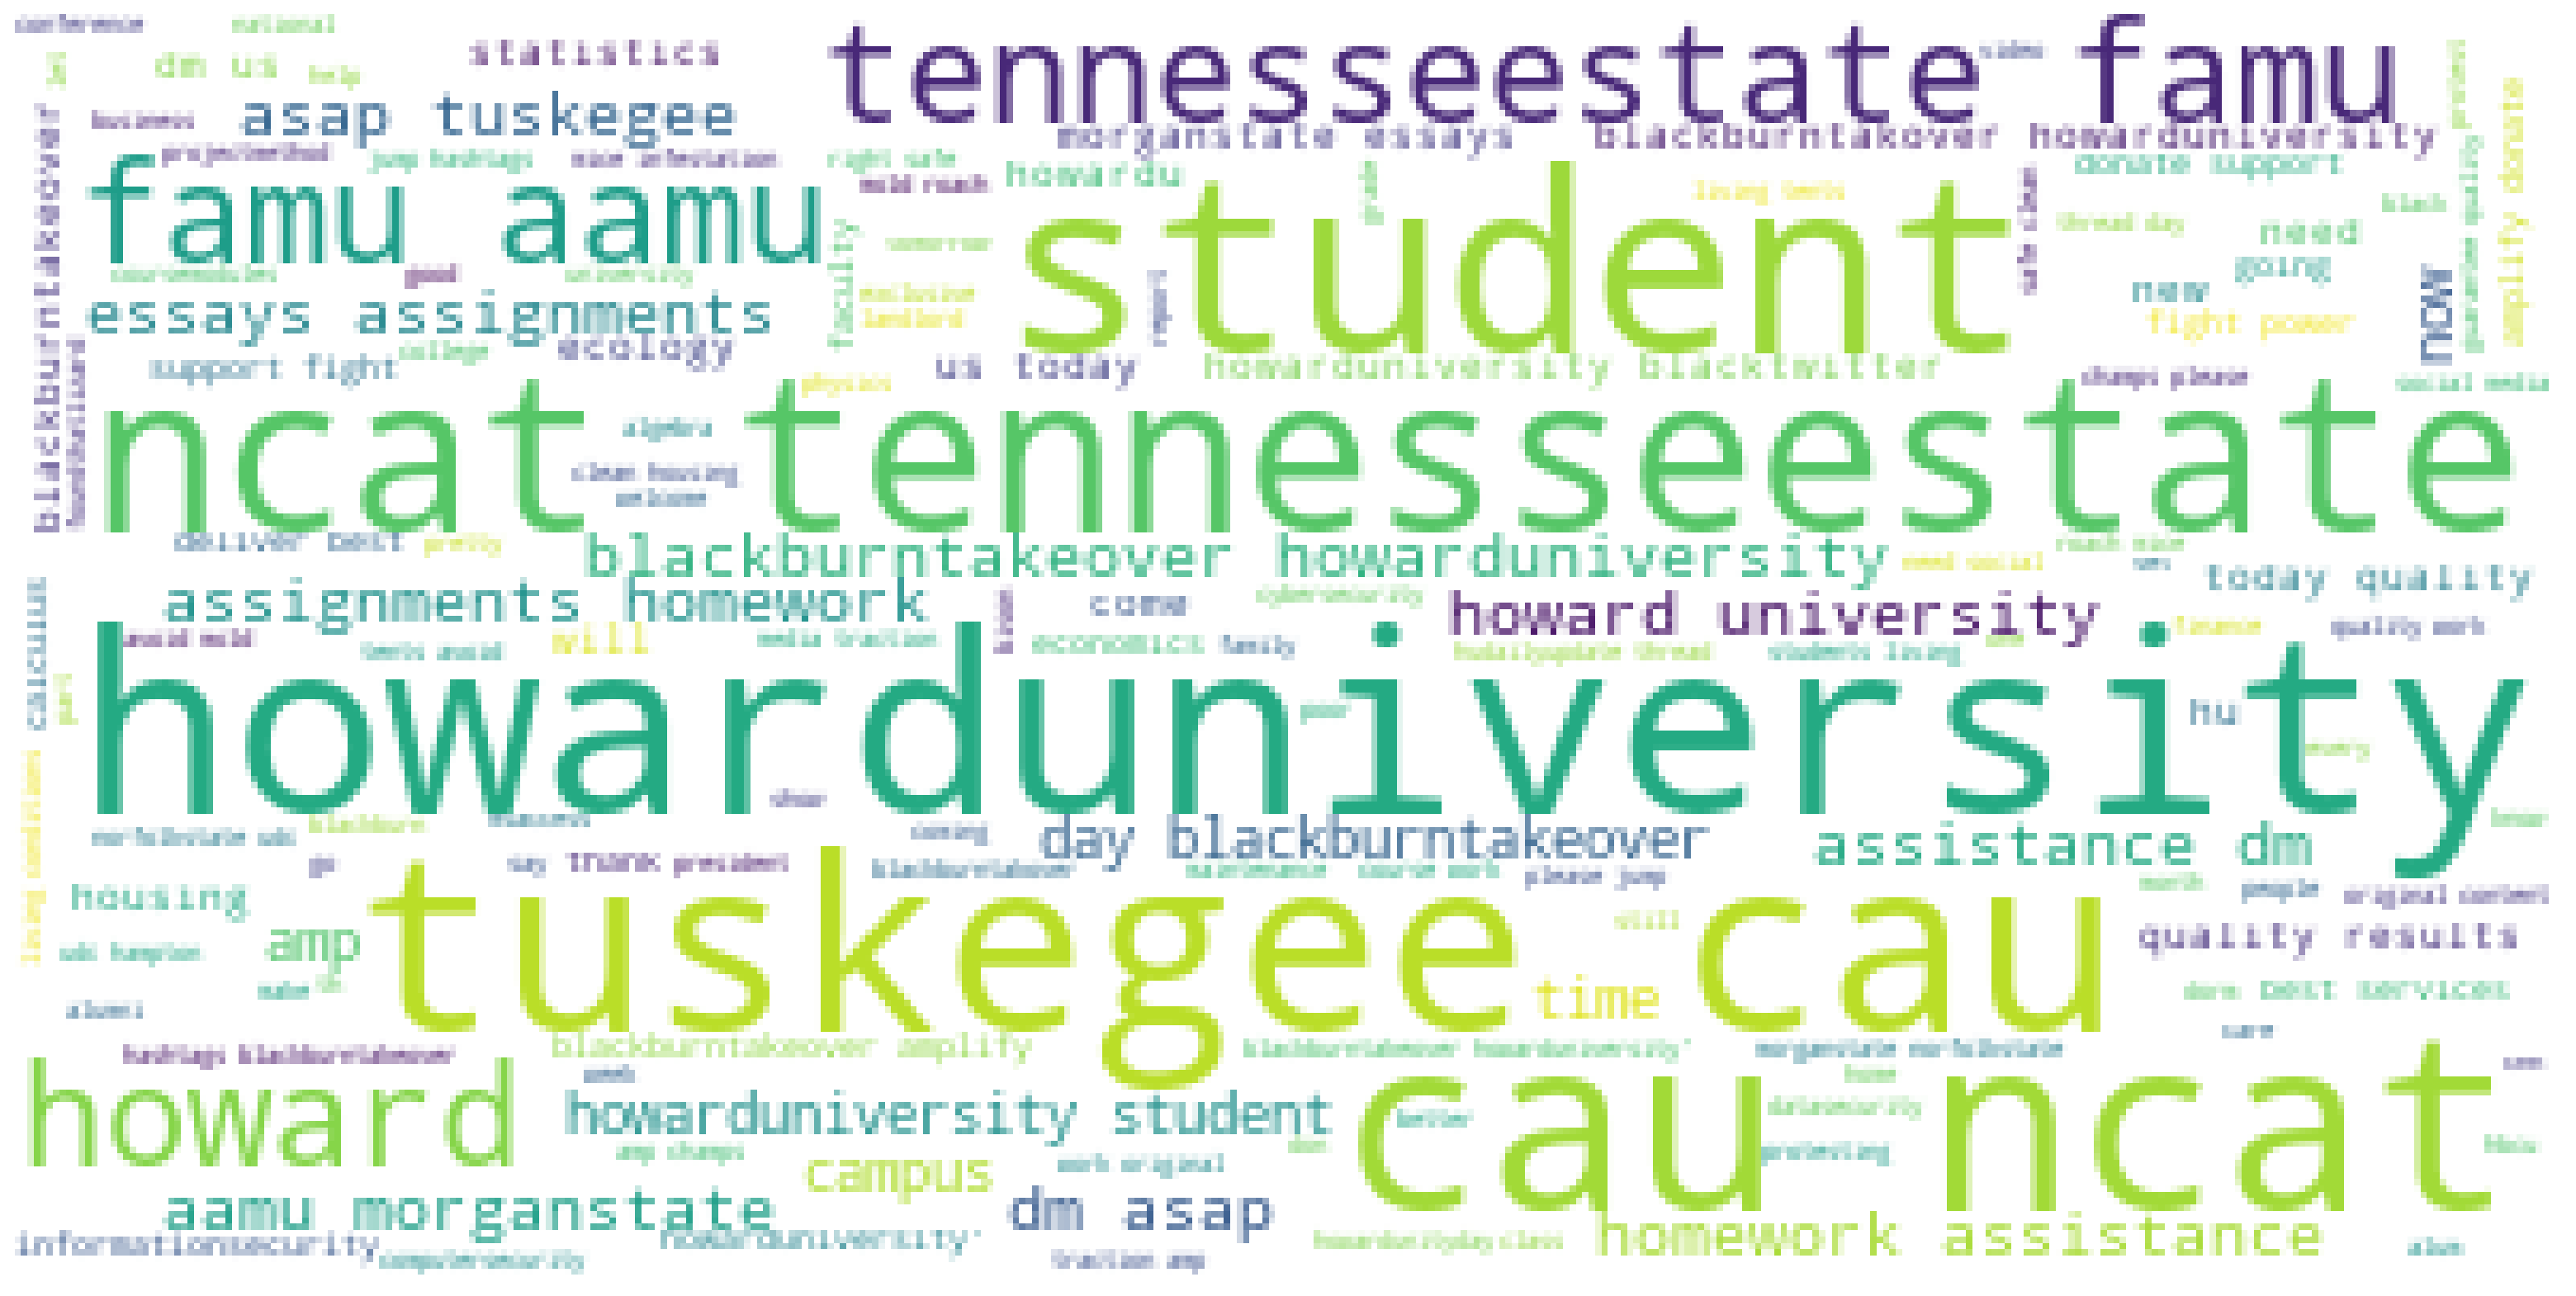

In [ ]:
#Creating wordcloud for all tweets
create_wordcloud(tw_list["text"].values)

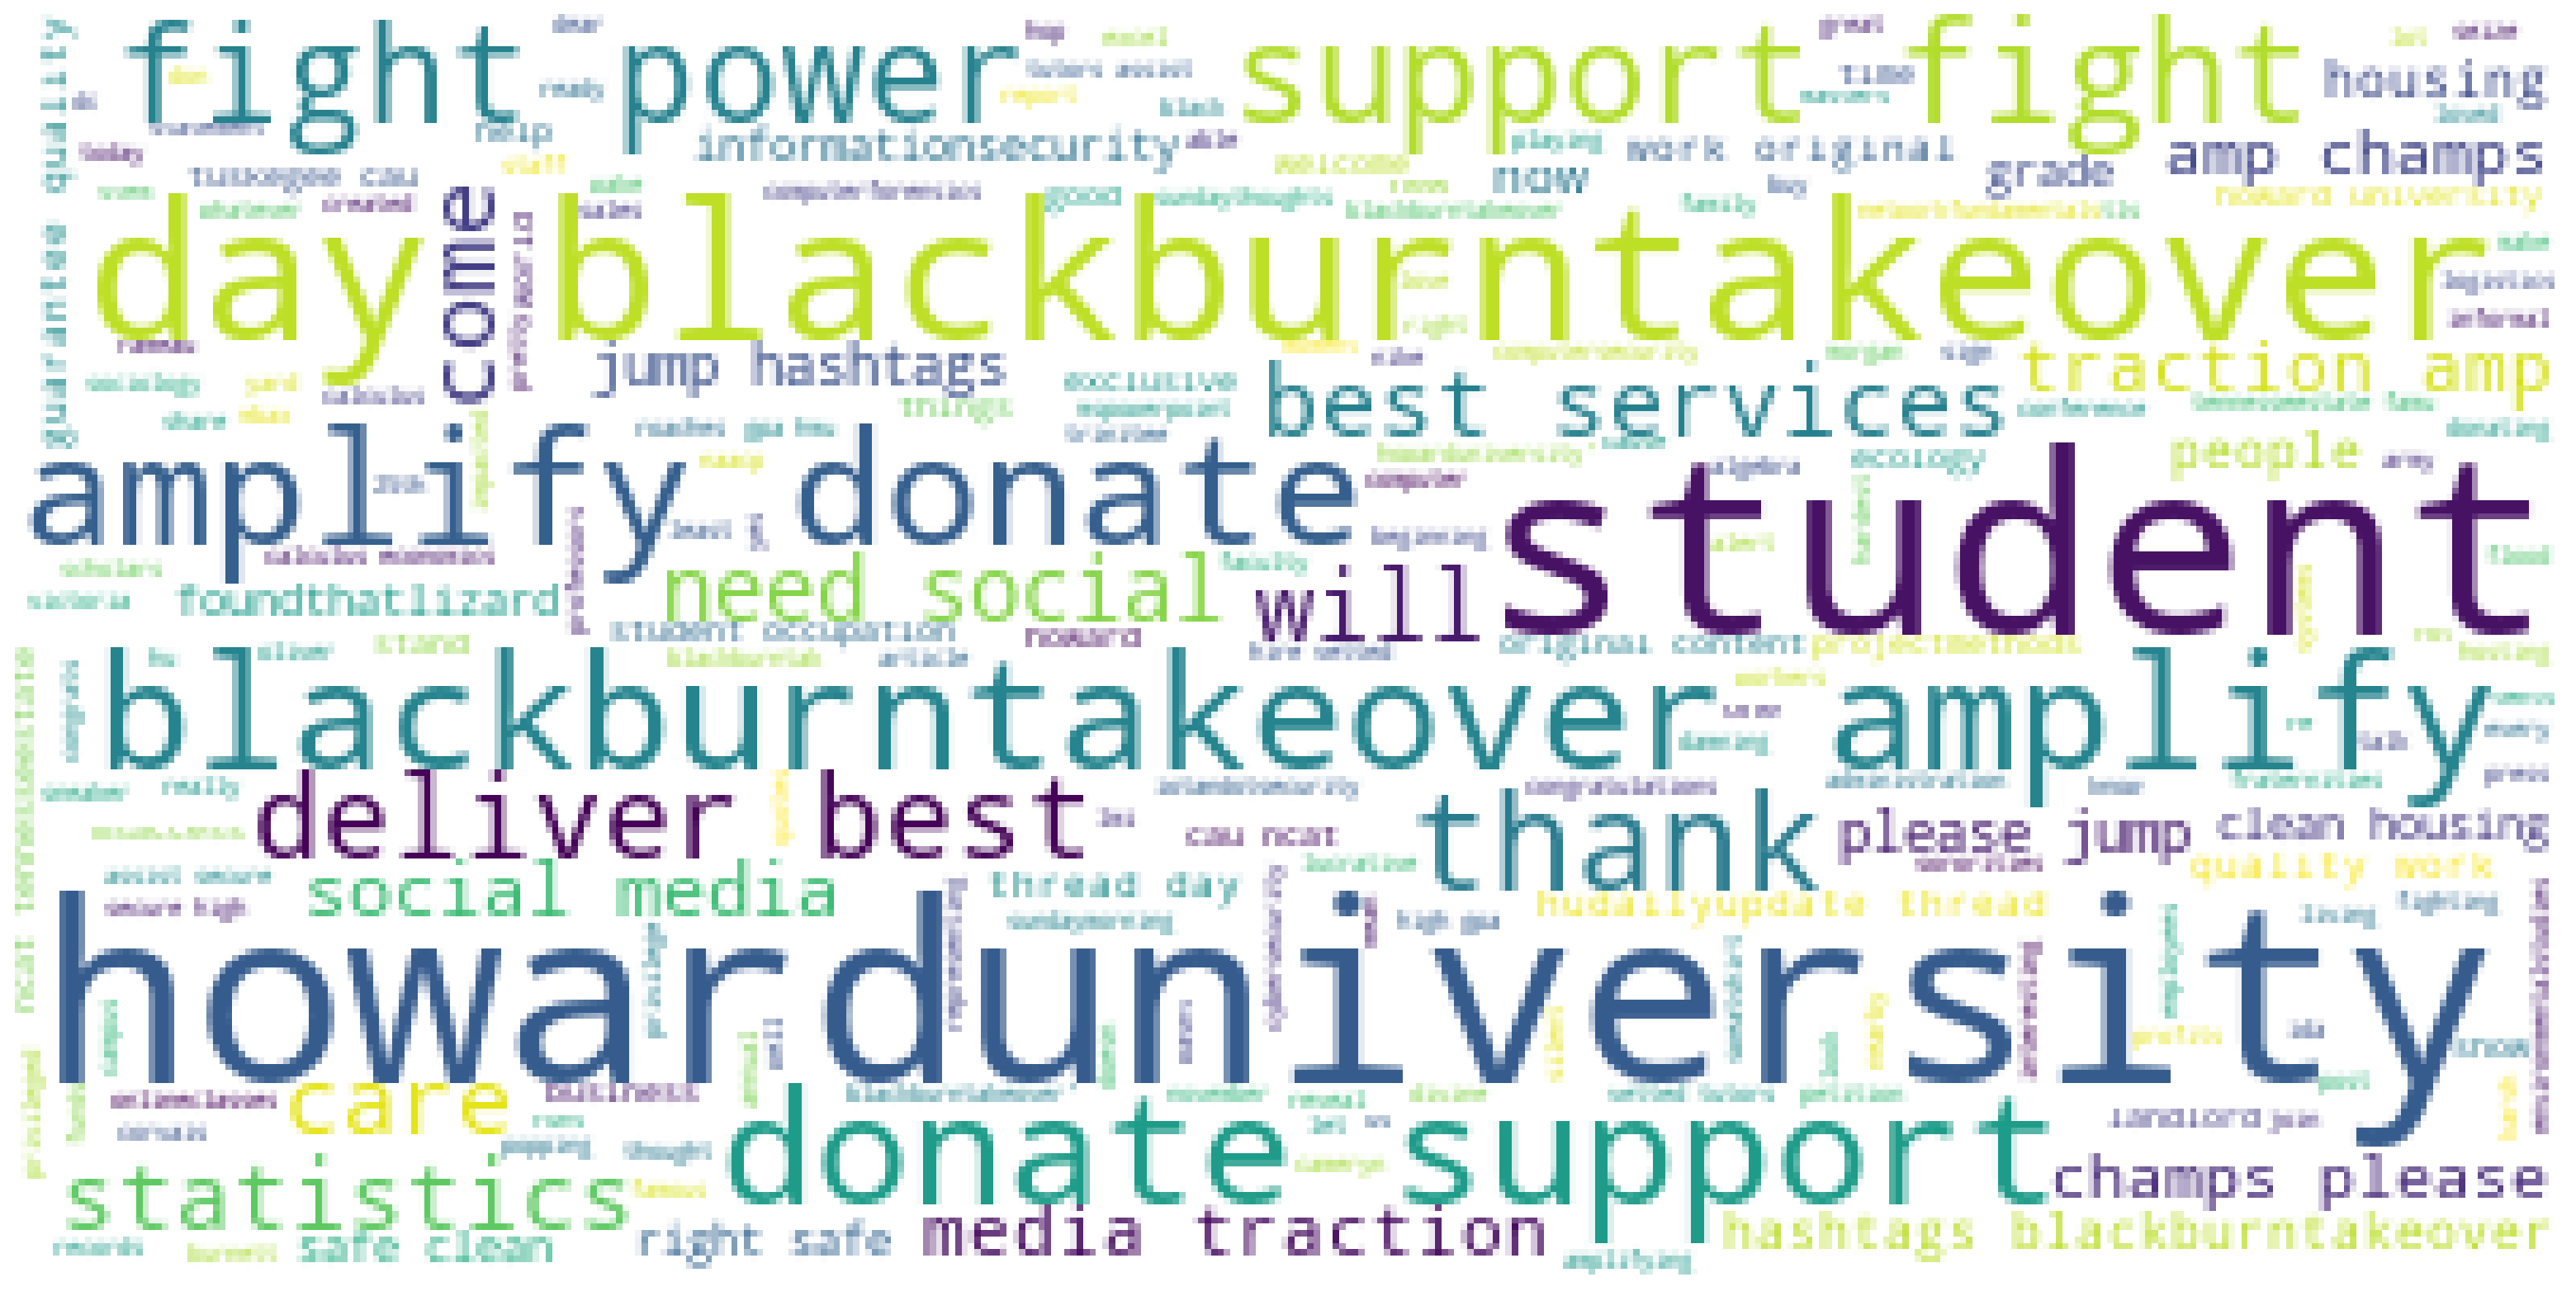

In [ ]:
#Creating wordcloud for positive tweets
create_wordcloud(tw_list_positive["text"].values)

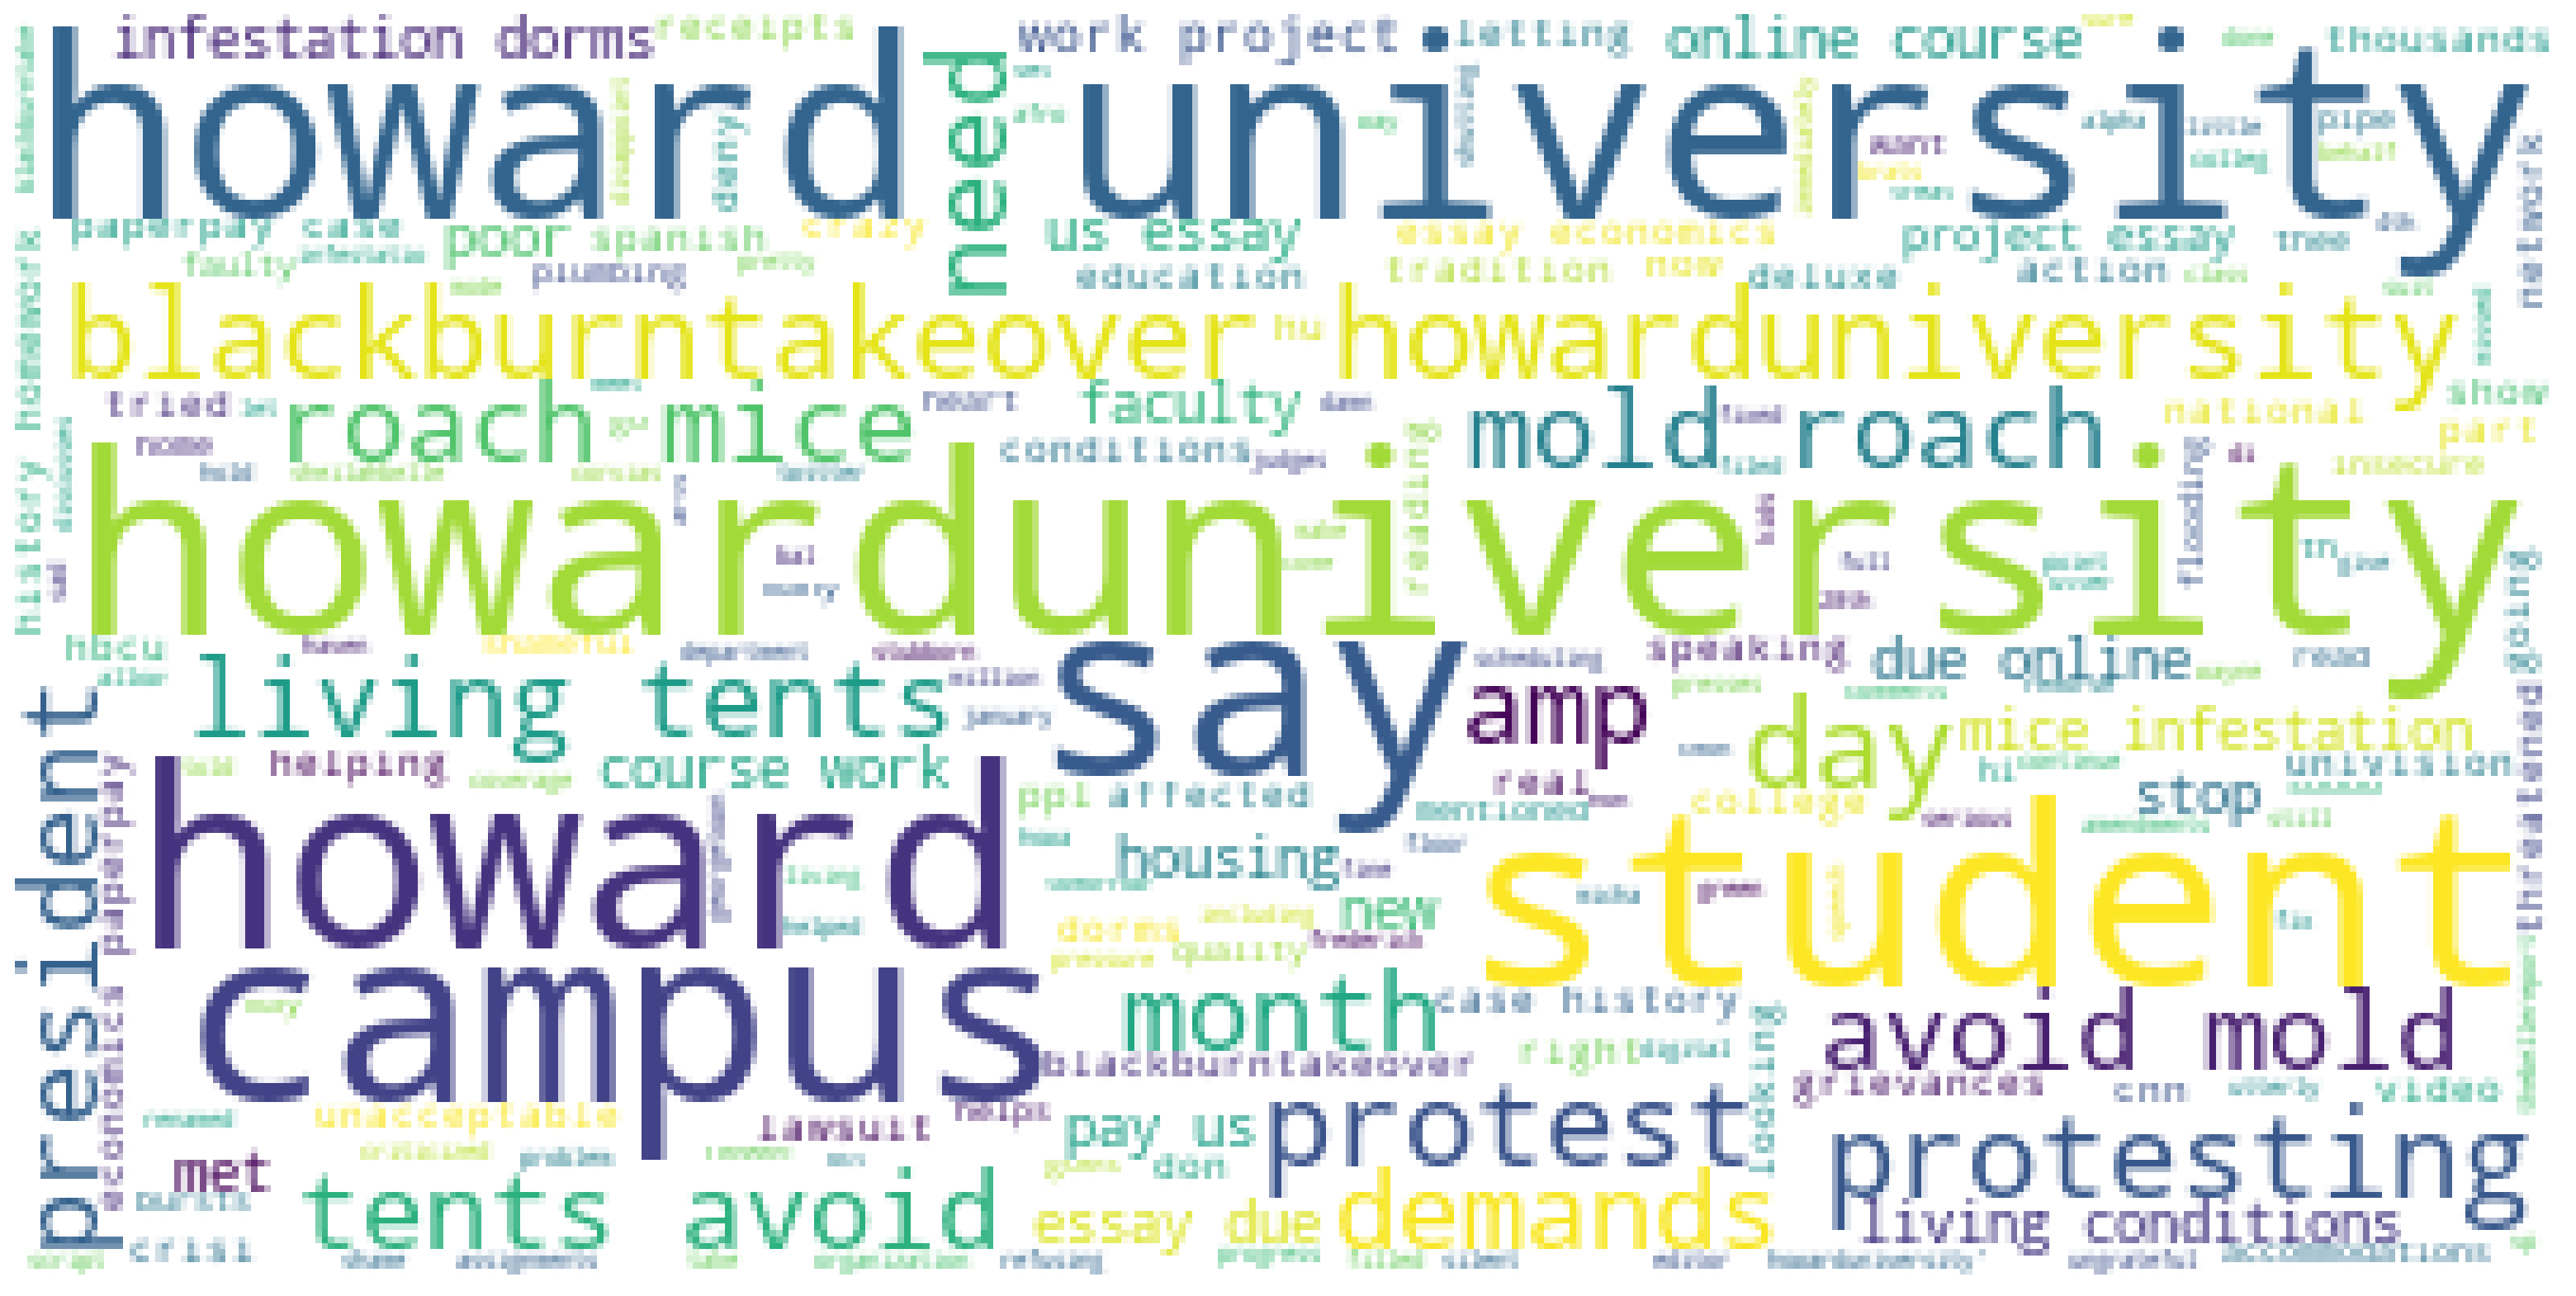

In [ ]:
#Creating wordcloud for negative tweets
create_wordcloud(tw_list_negative["text"].values)

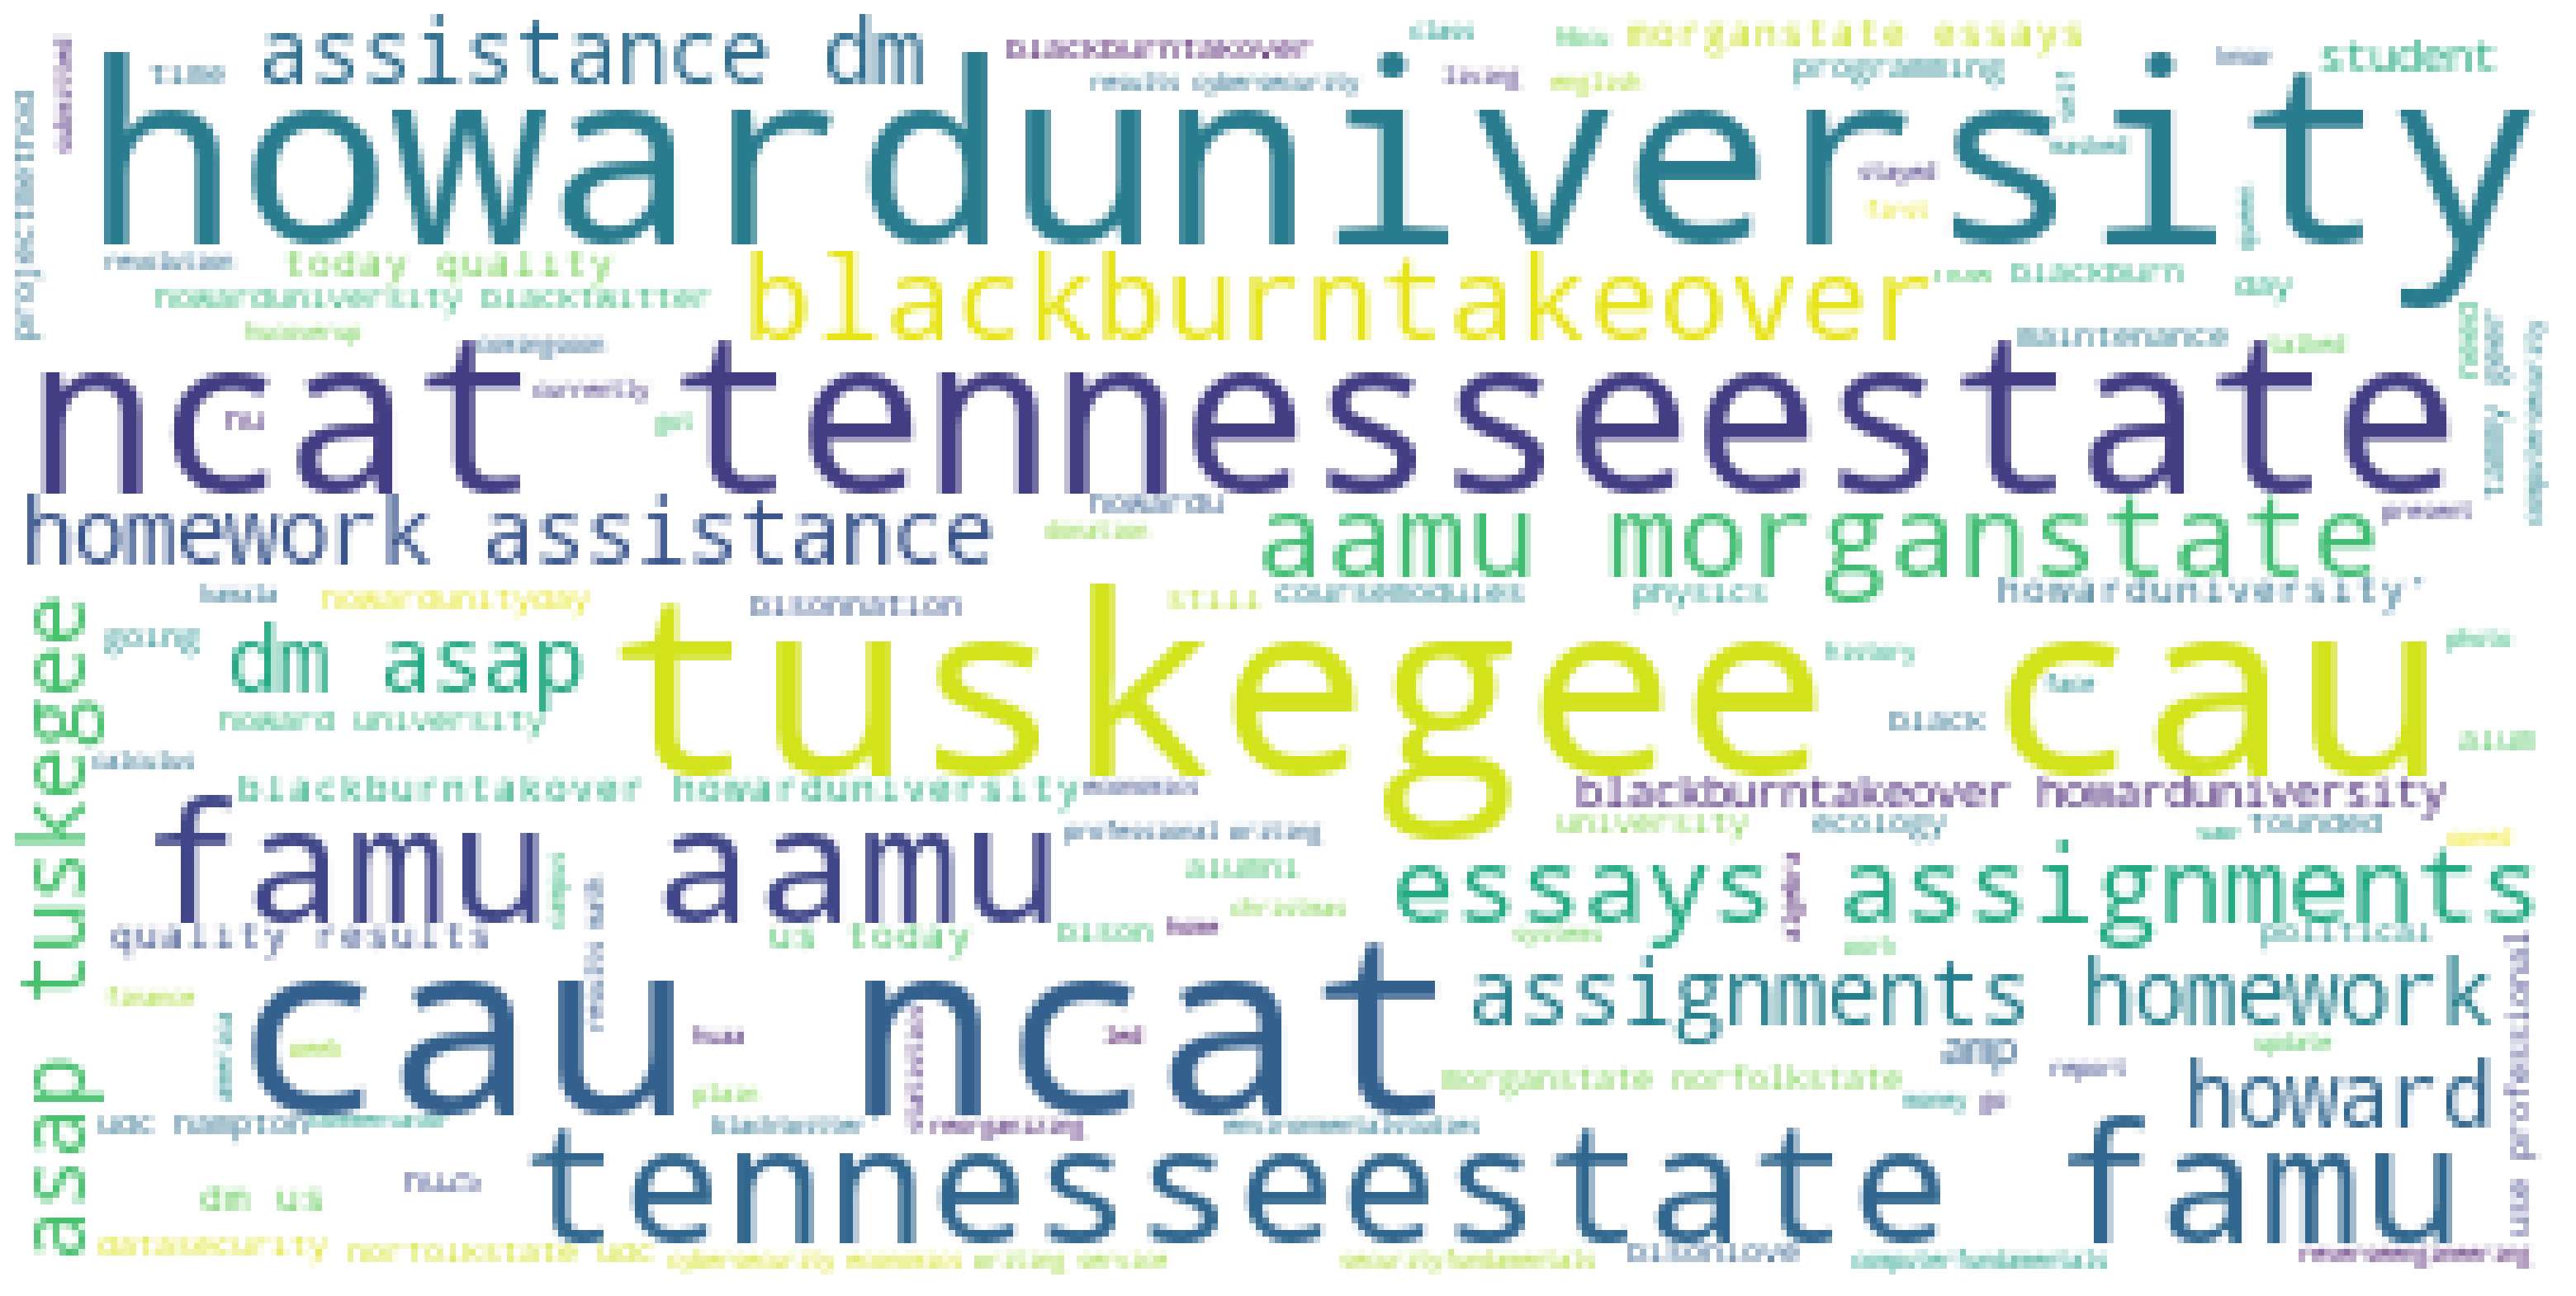

In [ ]:
#Creating wordcloud for neutral tweets
create_wordcloud(tw_list_neutral["text"].values)

In [ ]:
#Calculating tweet’s length and word count
tw_list["text_len"] = tw_list["text"].astype(str).apply(len)
tw_list["text_word_count"] = tw_list["text"].apply(lambda x: len(str(x).split()))
round(pd.DataFrame(tw_list.groupby("sentiment").text_len.mean()),2)
round(pd.DataFrame(tw_list.groupby("sentiment").text_word_count.mean()),2)

,text_word_count
sentiment,
negative,17.05
neutral,11.63
positive,15.43
